In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt

comments = pd.read_csv('D:/Data_Analysis/Projects/Analyzing_youtube/GBcomments.csv',error_bad_lines = False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [2]:
comments.head(5)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [3]:
from textblob import TextBlob

In [4]:
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [5]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)

In [7]:
polarity = []

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [8]:
comments['polarity'] = polarity

In [9]:
comments.head(20)

video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   
16  jt2OHQh0HoQ  They really just took the samsung s8 and named...      0   
17  jt2OHQh0HoQ  so if someone has a twin sibling both can unlo...      0   
18  jt2OHQh0HoQ             For god sake its better than my ps4pro      0   
19  jt2OHQh0HoQ     7mp cam what kind of standard is this in 2017?      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000  
15        0  0.500000  
16        0  0.200000  
17        0  0.250000  
18        0  0.500000  
19        0  0.300000

In [10]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [11]:
comments.shape

(718424, 5)

In [12]:
comments.count()

video_id        718424
comment_text    718424
likes           718424
replies         718424
polarity        718424
dtype: int64

### Filtering Postive and Negative Comments

In [13]:
positive_comments = comments[comments['polarity']==1]

In [14]:
positive_comments.shape

(20400, 5)

In [15]:
negative_comments = comments[comments['polarity']==-1]

In [16]:
negative_comments.shape

(3339, 5)

In [17]:
comments.shape

(718424, 5)

## Positive Comments WordCloud

In [18]:
positive_comments['comment_text']

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
stopwords = set(STOPWORDS)

In [21]:
total_comments = ''.join(positive_comments['comment_text'])

In [22]:
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The best thing to ever happen to iPhoneApple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4das a lot of edditing you have done there ... I like it :DWelcome to the Scandiworld!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!the sonic air timer was perfectno 16 on trending impressiveMy daughters name is lacey <3I'm 17 and can proudly say Moon Dreamers was one of my favourite shows!if I could subscribe to Dude Perfect a million times I wouldYou guys should make dude perfect sceetsTo be a dude perfect member it is so awesome ....Dude Perfect sh

In [23]:
wordcloud = WordCloud(width = 1000 , height = 500, stopwords = stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

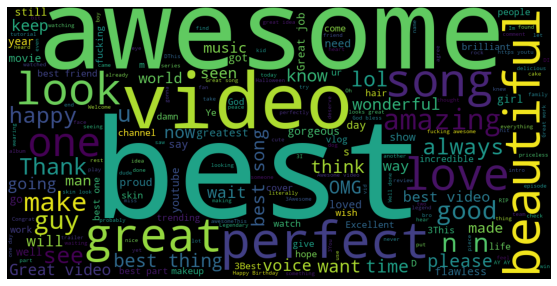

In [24]:
pt.figure(figsize=(15,5))
pt.imshow(wordcloud)
pt.axis('off')

## Negative Comments WordCloud

In [25]:
negative_comments = comments[comments['polarity']==-1]

In [26]:
negative_comments.shape

(3339, 5)

In [27]:
total_comments = ''.join(negative_comments['comment_text'])

In [28]:
total_comments

"boring0:22   **laughs at terrible pun**this is the worst thing i've heard. ever.People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect.Thats insane.How is this trending ? AwfulButthurt Sean, idiot!Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!!Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everythingPlease let this die, you can tell the actors are miserable.can't wait :'(Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nastyHandmaids Tale was boring, I foundI won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic!all the products are horriblejim carrey lost it, became a boring socialist hippyWinner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons.Terrible, at times like this we need to come together not stealYour style is

In [29]:
wordcloud = WordCloud(width = 1000,height = 500, stopwords = stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

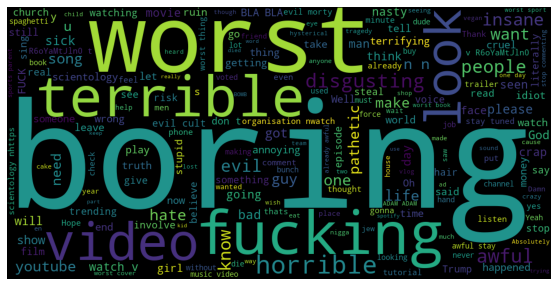

In [30]:
pt.figure(figsize=(15,5))
pt.imshow(wordcloud)
pt.axis('off')

## Simplified by defining a function

In [31]:
def positiveComments(total_comments):
    from wordcloud import WordCloud
    wordcloud=WordCloud(width=1000,height=500,stopwords = stopwords).generate(total_comments)
    pt.figure(figsize=(15,5))
    pt.imshow(wordcloud)
    pt.axis('off')

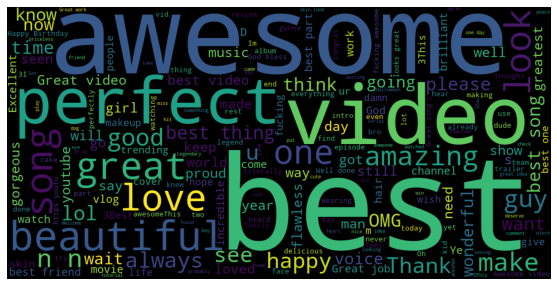

In [32]:
positiveComments(total_comments=''.join(positive_comments['comment_text']))

In [33]:
positive_comments=comments[comments['polarity']==1]

In [34]:
positive_comments.shape

(20400, 5)

## Performing Analysis on video Tags

In [35]:
videos = pd.read_csv('D:/Data_Analysis/Projects/Analyzing_youtube/USvideos.csv',error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [36]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [37]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [38]:
complete_tags = ' '.join(videos['tags'])

In [39]:
complete_tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [40]:
import re #importing RegularExpression

In [41]:
tags= re.sub('[^a-zA-Z]',' ',complete_tags)  #substituting the unnecessary spaces and symbols from complete_tags

In [42]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [43]:
tags = re.sub(' +',' ',tags) # removing unneccessary spaces

In [44]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [45]:
wordcloud = WordCloud(width = 1000,height = 500, stopwords = stopwords).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

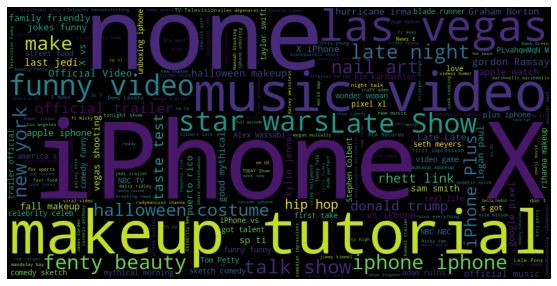

In [46]:
pt.figure(figsize=(15,5))
pt.imshow(wordcloud)
pt.axis('off')

## Performing Analysis on views,likes,dislikes and co-relation between them

Text(0.5, 1.0, 'Regression plot for views and likes')

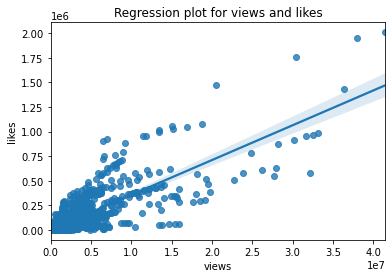

In [47]:
sb.regplot(data=videos,x='views',y='likes')  # on the top we imported seaborn as sb and regplot is a function in seaborn
pt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

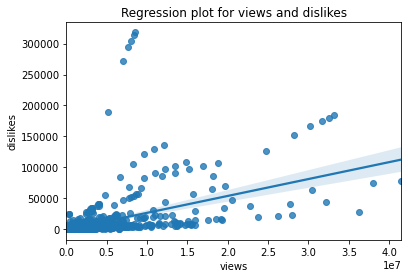

In [48]:
sb.regplot(data=videos,x='views',y='dislikes')  
pt.title('Regression plot for views and dislikes')

In [49]:
df_corr = videos[['views','likes','dislikes']].corr()

In [50]:
df_corr

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

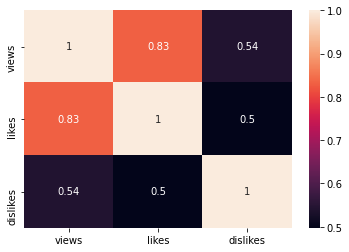

In [103]:
sb.heatmap(df_corr,annot=True)